[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W2/W2P4.ipynb)

In [1]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis testing for means using t-statistic

In [2]:
np.random.seed(10)  ### we fix this to get the same result always
A = 2*np.random.randn(25)+120

In [3]:
weights = np.array([int(a) for a in A])

In [4]:
weights

array([122, 121, 116, 119, 121, 118, 120, 120, 120, 119, 120, 122, 118,
       122, 120, 120, 117, 120, 122, 117, 116, 116, 120, 124, 122])

We will do it in two different ways! 
1)

In [5]:
scipy.stats.ttest_1samp(weights, 120)

TtestResult(statistic=-0.742514692727346, pvalue=0.4649814516616134, df=24)

Here the p-value is larger than 0.05 so we do not have enough evidence to reject null hyp.

In [6]:
t_obs = (np.mean(weights) - 120)/(np.std(weights, ddof = 1)/np.sqrt(25))
print(t_obs)

-0.7425146927273459


# Let's implement Chi-square test for variance ($\chi^2$ test).
Remember that this test tests
$H_0 : \sigma = a$ against
$H_1 : \sigma \neq 0$ (may be one sided)

BTW, you need to make sure that you sample from normal population.

In [7]:
A = [np.std(2*np.random.randn(10), ddof = 1) for _ in range(100000)]
S = [(9)*i**2/4 for i in A]  #### (n-1)s^2/\sigma^2

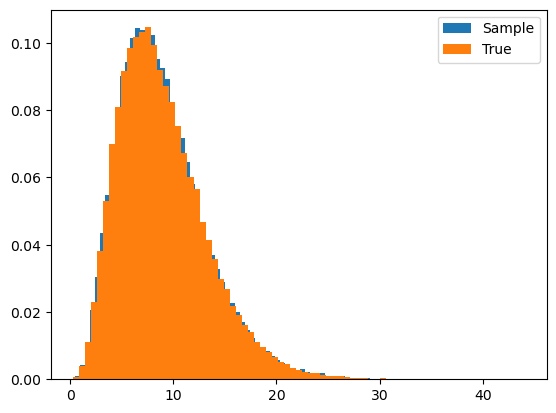

In [8]:
plt.hist(S, bins = 75, density = True, label = "Sample")
plt.hist(np.random.chisquare(9, 100000), density = True, bins = 75, label = "True")
plt.legend()
plt.show()

#Below we implement $\chi^2$ test for population variance.

In [9]:
from scipy.stats import chi2

def var_test(x :np.array, pop_var : float, direction = "two-tailed", alpha = 0.05):
  if direction not in ["two-tailed", "upper", "lower"]:
    raise NameError("Direction can be: two-tailed, upper or lower")
  n = len(x)
  Q = (n - 1) * np.var(x, ddof = 1) / pop_var   ### observed value we have here
  if direction == "lower":
    ### H_0 = pop_var
    ### H_1 < pop_var
    return chi2.ppf(alpha, n-1), Q
  elif direction == "upper":
    ### H_0 = pop_var
    ### H_1 > pop_var    
    return chi2.ppf(1- alpha, n-1), Q

  else:  ##### two tailed is covered here.
    return (chi2.ppf(alpha/2, n-1), chi2.ppf(1- alpha/2, n-1)), Q

In [ ]:
np.random.seed(3)  ##3 we fix the seed to not to get different result each time!
x = 1.4*np.random.randn(10)+10
print(x)

[12.50407986 10.61111379 10.13509646  7.39111022  9.61165652  9.50333743
  9.88416193  9.12219905  9.93865456  9.33189476]


In [ ]:
var_test(x, pop_var = 1.4**2, direction = "two-tailed")

((2.7003894999803584, 19.02276779864163), 7.506739339190276)

In [ ]:
T = np.array([round(i,2) for i in x])
np.std(T, ddof = 1)

1.2782435865932074

In [ ]:
var_test(T, 4, direction =  "two-tailed", alpha = 0.0001)

((0.5614241213791791, 35.43118279775571), 3.67629)

#Here we have an irrelevant example

In [ ]:
var_test(np.random.chisquare(10,1000), 10, direction =  "two-tailed", alpha = 0.05)

((913.3009983021134, 1088.4870677259353), 1867.1503482255873)